## Document Vector Comparison



### 📘 Assignment: Document Vectorization and Similarity

Suppose we have the following dictionary:

`{table, chair, man, woman, night, day, one, two, sit, stand}`

Given the following three documents containing one sentence each:

- **Document 1:** “This man has one table and that man has two”  
- **Document 2:** “one day the woman bought a table and a chair”  
- **Document 3:** “every day and night the two man sit on their chair and table”  

#### Tasks:

**a.** Convert the documents into word count vectors.  
> Note: First remove any word from the documents that is not in the dictionary.

**b.** Find which of **Document 2** and **Document 3** is **closer/similar** to **Document 1** using:
- Euclidean Distance  
- Cosine Similarity


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

In [13]:
# Step 1: Dictionary and Documents
dictionary = ["table", "chair", "man", "woman", "night", "day", "one", "two", "sit", "stand"]

doc1 = "This man has one table and that man has two"
doc2 = "one day the woman bought a table and a chair"
doc3 = "every day and night the two man sit on their chair and table"

In [14]:
# Step 2: Preprocess - remove non-dictionary words
def preprocess(doc, dictionary):
    words = doc.lower().split()
    return [word for word in words if word in dictionary]

tokens1 = preprocess(doc1, dictionary)
tokens2 = preprocess(doc2, dictionary)
tokens3 = preprocess(doc3, dictionary)


In [15]:
# Step 3: Convert to vectors
def doc_to_vector(tokens, dictionary):
    return np.array([tokens.count(word) for word in dictionary])

vec1 = doc_to_vector(tokens1, dictionary)
vec2 = doc_to_vector(tokens2, dictionary)
vec3 = doc_to_vector(tokens3, dictionary)

In [16]:
# Step 4: Print vectors
print("Vector for Document 1:", vec1)
print("Vector for Document 2:", vec2)
print("Vector for Document 3:", vec3)

Vector for Document 1: [1 0 2 0 0 0 1 1 0 0]
Vector for Document 2: [1 1 0 1 0 1 1 0 0 0]
Vector for Document 3: [1 1 1 0 1 1 0 1 1 0]


In [17]:
# Step 5: Calculate Euclidean distances
dist_1_2 = euclidean(vec1, vec2)
dist_1_3 = euclidean(vec1, vec3)

In [18]:
# Step 6: Calculate Cosine similarities
cos_1_2 = cosine_similarity([vec1], [vec2])[0][0]
cos_1_3 = cosine_similarity([vec1], [vec3])[0][0]

In [19]:
# Step 7: Output distance/similarity
print("\nEuclidean Distance (Doc1, Doc2):", dist_1_2)
print("Euclidean Distance (Doc1, Doc3):", dist_1_3)

print("\nCosine Similarity (Doc1, Doc2):", round(cos_1_2, 3))
print("Cosine Similarity (Doc1, Doc3):", round(cos_1_3, 3))

closer_doc = "Document 3" if dist_1_3 < dist_1_2 else "Document 2"
similar_doc = "Document 3" if cos_1_3 > cos_1_2 else "Document 2"

print("\nCloser document to Doc1 (by Euclidean):", closer_doc)
print("More similar document to Doc1 (by Cosine Similarity):", similar_doc)


Euclidean Distance (Doc1, Doc2): 2.8284271247461903
Euclidean Distance (Doc1, Doc3): 2.449489742783178

Cosine Similarity (Doc1, Doc2): 0.338
Cosine Similarity (Doc1, Doc3): 0.571

Closer document to Doc1 (by Euclidean): Document 3
More similar document to Doc1 (by Cosine Similarity): Document 3


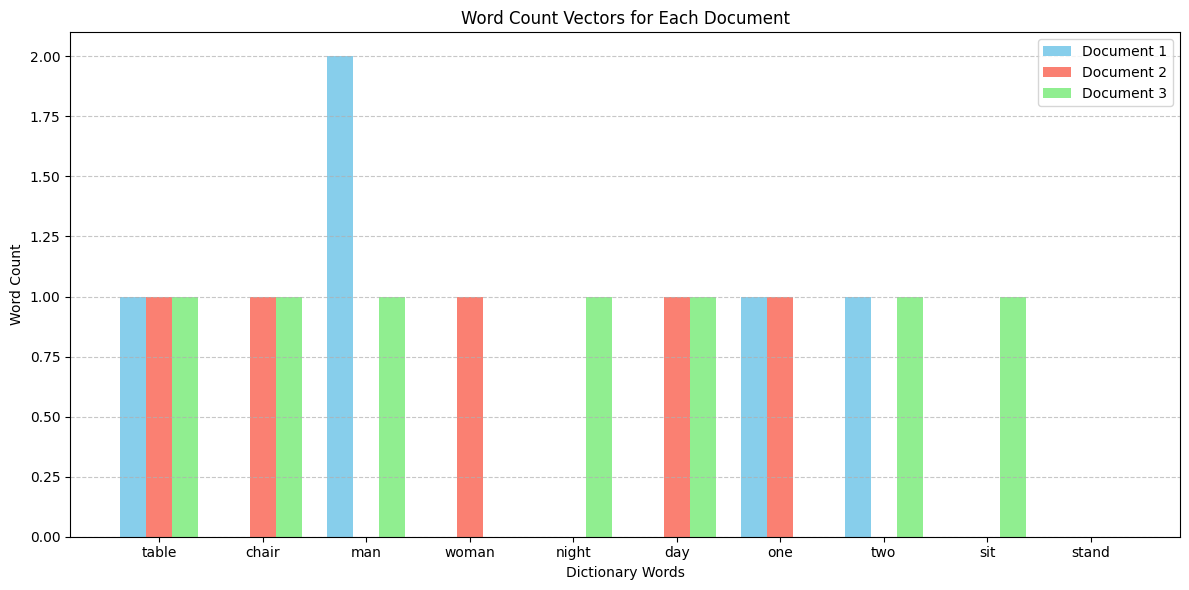

In [20]:
# Step 8: Visualization
x = np.arange(len(dictionary))  # x locations for the groups
width = 0.25  # the width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width, vec1, width, label='Document 1', color='skyblue')
plt.bar(x, vec2, width, label='Document 2', color='salmon')
plt.bar(x + width, vec3, width, label='Document 3', color='lightgreen')

plt.xlabel('Dictionary Words')
plt.ylabel('Word Count')
plt.title('Word Count Vectors for Each Document')
plt.xticks(x, dictionary)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()